Assignment:

Build the linear regression model using scikit learn in boston data to predict 'Price' based on other dependent variable.

In [2]:
# Imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

%matplotlib inline

In [3]:
# Loading inbuilt data

from sklearn.datasets import load_boston
boston = load_boston()
bos = pd.DataFrame(boston.data)

In [14]:
#After executing bos.head(5) command initially found there is no column headers so I added the column header 
#for better understanding the data

print(boston.feature_names)

bos.columns = boston.feature_names 

bos.head(5)


['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


#Understanding Boston Data
#Ref : https://www.geeksforgeeks.org/ml-boston-housing-kaggle-challenge-with-linear-regression/

This is based on Carnegie Mellon University data. It contains following features:

CRIM: Per capita crime rate by town

ZN: Proportion of residential land zoned for lots over 25,000 sq. ft

INDUS: Proportion of non-retail business acres per town

CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

NOX: Nitric oxide concentration (parts per 10 million)

RM: Average number of rooms per dwelling

AGE: Proportion of owner-occupied units built prior to 1940

DIS: Weighted distances to five Boston employment centers

RAD: Index of accessibility to radial highways

TAX: Full-value property tax rate per $10,000

PTRATIO: Pupil-teacher ratio by town

B: 1000(Bk — 0.63)², where Bk is the proportion of [people of African American descent] by town

LSTAT: Percentage of lower status of the population

MEDV: Median value of owner-occupied homes in $1000s



In [15]:
bos.shape

(506, 13)

Total of 506 Rows and 13 Columns available(X Values)

In [16]:
bos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [17]:
# Finding count of missing value
bos.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

Data Looks good No NA value. However Price not available.Hence adding the price to the table

In [18]:
bos['Price'] = boston.target 

In [19]:
bos.shape

(506, 14)

In [20]:
bos.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


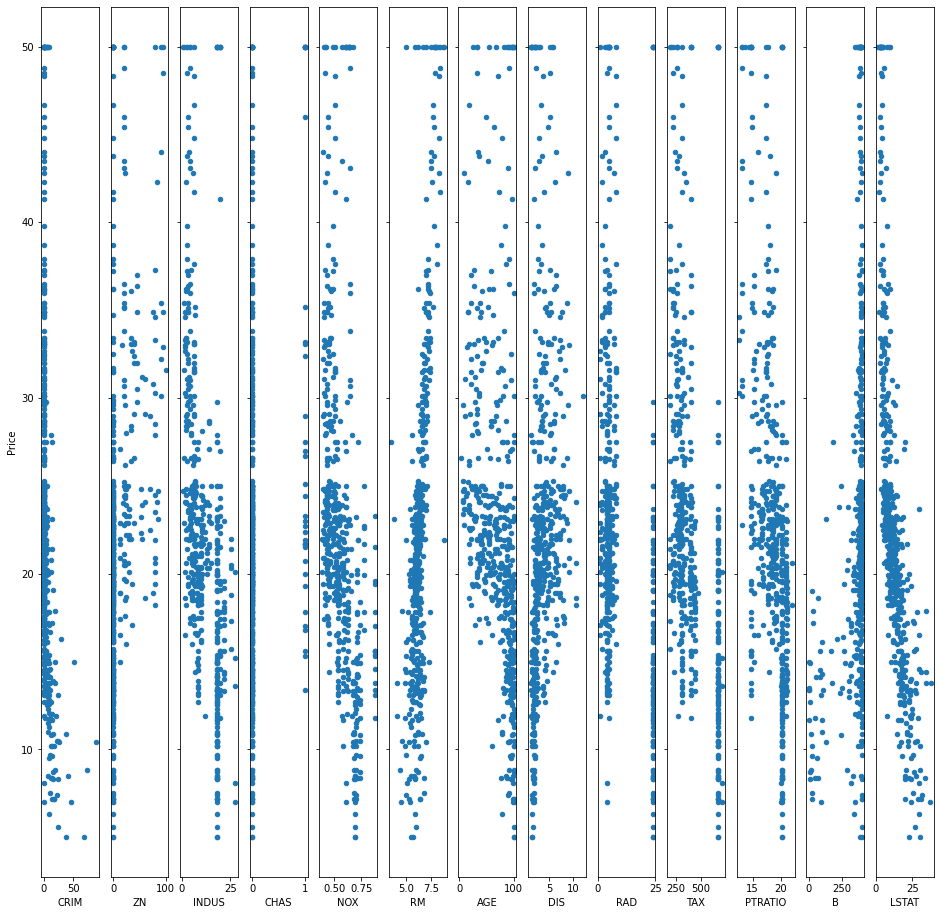

In [21]:
#Visualizing the linearity with Scatter Plots

fig, axs = plt.subplots(1, 13, sharey=True)
bos.plot(kind='scatter', x='CRIM', y='Price', ax=axs[0], figsize=(16, 16))
bos.plot(kind='scatter', x='ZN', y='Price', ax=axs[1])
bos.plot(kind='scatter', x='INDUS', y='Price', ax=axs[2])
bos.plot(kind='scatter', x='CHAS', y='Price', ax=axs[3])
bos.plot(kind='scatter', x='NOX', y='Price', ax=axs[4])
bos.plot(kind='scatter', x='RM', y='Price', ax=axs[5])
bos.plot(kind='scatter', x='AGE', y='Price', ax=axs[6])
bos.plot(kind='scatter', x='DIS', y='Price', ax=axs[7])
bos.plot(kind='scatter', x='RAD', y='Price', ax=axs[8])
bos.plot(kind='scatter', x='TAX', y='Price', ax=axs[9])
bos.plot(kind='scatter', x='PTRATIO', y='Price', ax=axs[10])
bos.plot(kind='scatter', x='B', y='Price', ax=axs[11])
bos.plot(kind='scatter', x='LSTAT', y='Price', ax=axs[12])





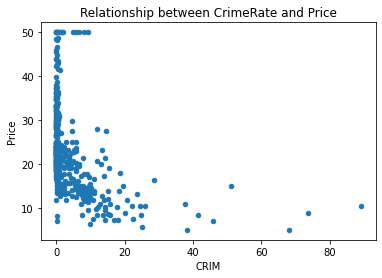

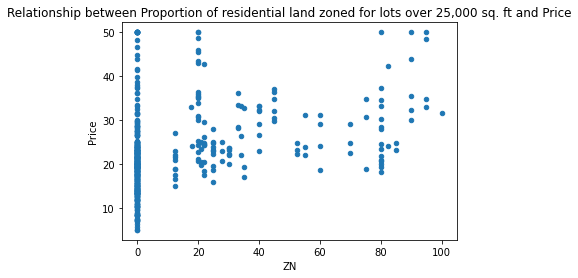

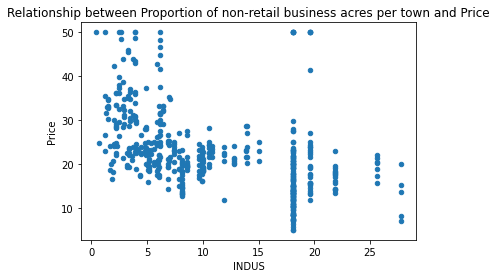

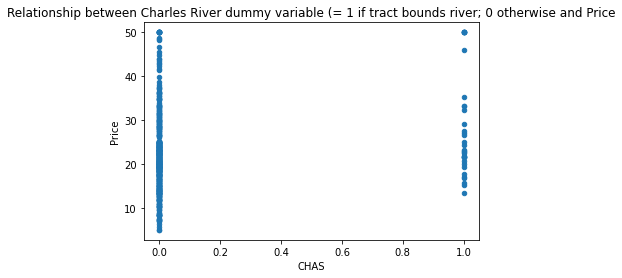

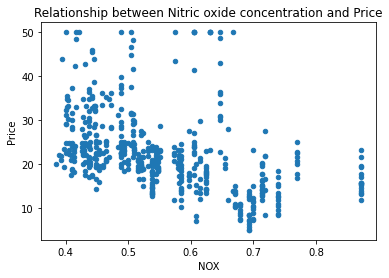

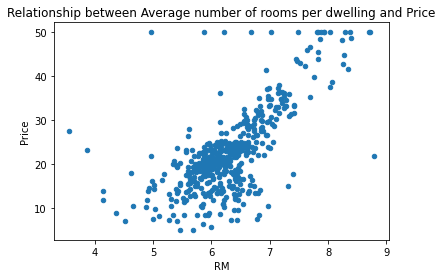

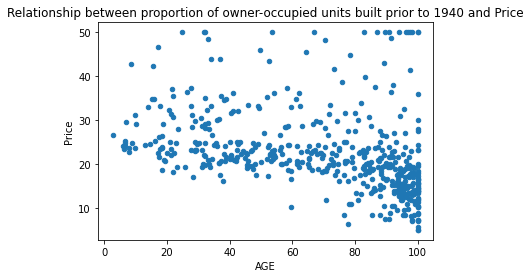

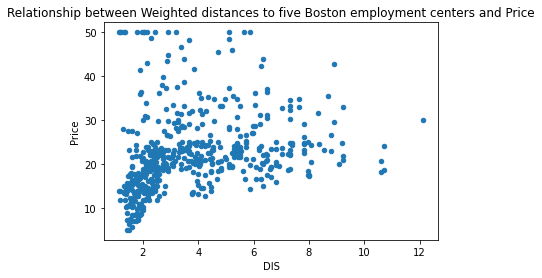

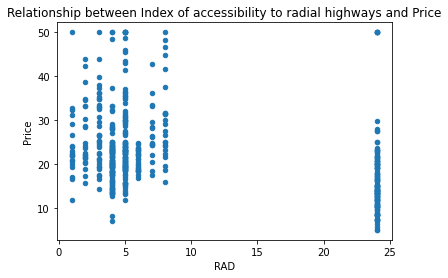

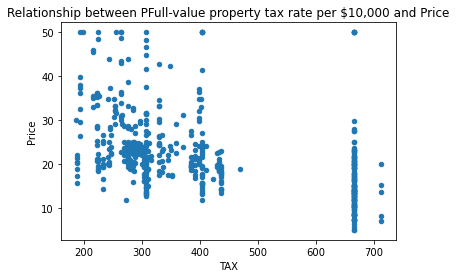

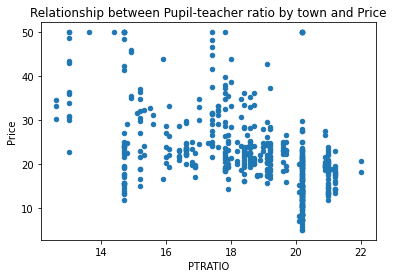

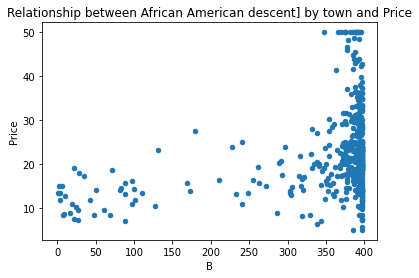

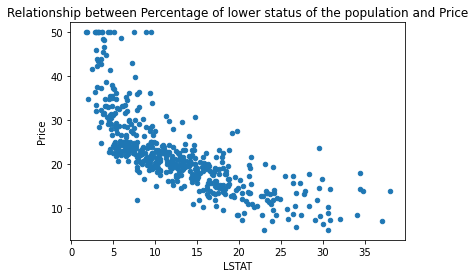

In [22]:
# Not able to get fully understand when we share the same frame. So tried doing it individually.

#sns.regplot(x="RM",y="PRICE", data=boston_df, fit_reg=True)

bos.plot(kind='scatter', x='CRIM', y='Price')
plt.title("Relationship between CrimeRate and Price")
plt.show()
# Places with high crime got less sales

bos.plot(kind='scatter', x='ZN', y='Price')
plt.title("Relationship between Proportion of residential land zoned for lots over 25,000 sq. ft and Price")
plt.show()

bos.plot(kind='scatter', x='INDUS', y='Price')
plt.title("Relationship between Proportion of non-retail business acres per town and Price")
plt.show()
# Prices high in less INDUS areas and more buying happened there

bos.plot(kind='scatter', x='CHAS', y='Price')
plt.title("Relationship between Charles River dummy variable (= 1 if tract bounds river; 0 otherwise and Price")
plt.show()

bos.plot(kind='scatter', x='NOX', y='Price')
plt.title("Relationship between Nitric oxide concentration and Price")
plt.show()
#Non Linear people prefer less NOX

bos.plot(kind='scatter', x='RM', y='Price')
plt.title("Relationship between Average number of rooms per dwelling and Price")
plt.show()
# More linear when Room increase price increase

bos.plot(kind='scatter', x='AGE', y='Price')
plt.title("Relationship between proportion of owner-occupied units built prior to 1940 and Price")
plt.show()
#More buying in older homes

bos.plot(kind='scatter', x='DIS', y='Price')
plt.title("Relationship between Weighted distances to five Boston employment centers and Price")
plt.show()
# People prefer more home when weighted distance is 1-5 and Price less than 30

bos.plot(kind='scatter', x='RAD', y='Price')
plt.title("Relationship between Index of accessibility to radial highways and Price")
plt.show()
# Unclear observation No values when RAD is between 9 and 24

bos.plot(kind='scatter', x='TAX', y='Price')
plt.title("Relationship between PFull-value property tax rate per $10,000 and Price")
plt.show()

bos.plot(kind='scatter', x='PTRATIO', y='Price')
plt.title("Relationship between Pupil-teacher ratio by town and Price")
plt.show()


bos.plot(kind='scatter', x='B', y='Price')
plt.title("Relationship between African American descent] by town and Price")
plt.show()
#No major changes

bos.plot(kind='scatter', x='LSTAT', y='Price')
plt.title("Relationship between Percentage of lower status of the population and Price")
plt.show()
#Observation when LSTAT decrease Price Increases


Observations:
1. When Crime Rate is low people buying homes. Once crime rate crosses 20 very limited sales in low budget homes and zero medium to high budget home sales
2. Negative Corelation INDUS,NOX,DIS and LSTAT
3. Positive Corelation on RM

In [23]:
# Implementing Linear Regression

# Loading from Inbuilt not from bos
x = boston.data 
y = boston.target 
   
#Splitting Data into test and train  
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state=355)

   
print("x_train shape : ", x_train.shape) 
print("x_test shape  : ", x_test.shape) 
print("y_train shape : ", y_train.shape) 
print("y_test shape  : ", y_test.shape) 

x_train shape :  (379, 13)
x_test shape  :  (127, 13)
y_train shape :  (379,)
y_test shape  :  (127,)


In [24]:
# Fitting Multi Linear regression model to training model 
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression() 
regressor.fit(x_train, y_train) 
   


LinearRegression()

In [25]:
# predicting the test set results 
y_pred = regressor.predict(x_test) 

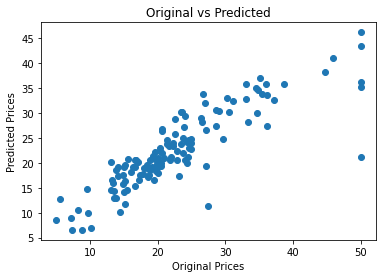

In [26]:
plt.scatter(y_test, y_pred)
plt.xlabel("Original Prices")
plt.ylabel("Predicted Prices")
plt.title("Original vs Predicted")
plt.show()

In [27]:
# Printing Intercept and Slope(CO-efficients)
print(regressor.intercept_)
print(regressor.coef_)

30.244920872475078
[-1.03237338e-01  5.04498921e-02 -1.69407715e-02  3.76343839e+00
 -1.71713959e+01  4.42605664e+00 -1.39558697e-02 -1.51537296e+00
  2.63113221e-01 -1.08409170e-02 -8.53270425e-01  8.99730695e-03
 -4.06334328e-01]


In [28]:
#importing regression modules
#ols- stands for Ordinary least squares: a method for estimating unknown parameters in a linear regression model
import statsmodels.api as sm
from statsmodels.formula.api import ols

m = ols('Price ~ CRIM + ZN + INDUS + CHAS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT  ', bos).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Wed, 03 Feb 2021   Prob (F-statistic):          6.72e-135
Time:                        15:30:52   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.0

P>|t| - Predictor contribution to Price

In [29]:
mse = sklearn.metrics.mean_squared_error(y_test, y_pred)
print(mse)
print(regressor.score(x_test , y_test))

22.178426943709656
0.7519030329262363


In [30]:
from sklearn.model_selection import train_test_split
X1 = bos[['NOX','RM','DIS','RAD','PTRATIO','LSTAT' ]]
Y1 = bos['Price']

x_trainnew, x_testnew, y_trainnew, y_testnew = train_test_split(X1, Y1, test_size =0.25,random_state = 5 )
print(x_trainnew.shape)
print(x_testnew.shape)
print(y_trainnew.shape)
print(y_testnew.shape)

(379, 6)
(127, 6)
(379,)
(127,)


In [31]:
# Fitting Multi Linear regression model to training model 
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression() 
regressor.fit(x_trainnew, y_trainnew) 
   

LinearRegression()

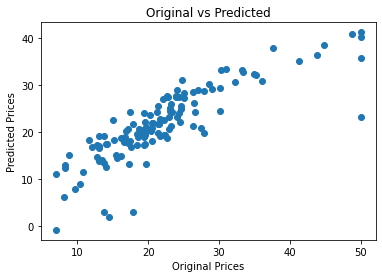

In [32]:
# predicting the test set results 
y_prednew = regressor.predict(x_testnew) 

plt.scatter(y_testnew, y_prednew)
plt.xlabel("Original Prices")
plt.ylabel("Predicted Prices")
plt.title("Original vs Predicted")
plt.show()

In [33]:
# Printing Intercept and Slope(CO-efficients)
print(regressor.intercept_)
print(regressor.coef_)

39.72439755057549
[-17.44151131   3.90848623  -1.05458752   0.05700175  -1.12721296
  -0.6224614 ]


In [34]:
mse = sklearn.metrics.mean_squared_error(y_testnew, y_prednew)
print(mse)

print(regressor.score(x_testnew , y_testnew))

23.733878642328275
0.7124606253123429


In [35]:
y_predtrain = regressor.predict(x_trainnew) 
mse1 = sklearn.metrics.mean_squared_error(y_trainnew, y_predtrain)
mse

23.733878642328275

In [36]:
#importing regression modules
#ols- stands for Ordinary least squares: a method for estimating unknown parameters in a linear regression model
import statsmodels.api as sm
from statsmodels.formula.api import ols

m = ols('Price ~ NOX + RM + DIS + RAD + PTRATIO + LSTAT  ', bos).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.706
Method:                 Least Squares   F-statistic:                     203.0
Date:                Wed, 03 Feb 2021   Prob (F-statistic):          2.07e-130
Time:                        15:31:23   Log-Likelihood:                -1527.6
No. Observations:                 506   AIC:                             3069.
Df Residuals:                     499   BIC:                             3099.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     40.6172      5.075      8.004      0.0

OBSERVATIONS:

The MeanSquaredError with all features is 22.178426943709656
The MeanSquaredError with only 5 features is 23.733878642328275
The Error has increased and most of the error came from RAD. So removing it and verifying

In [37]:
#importing regression modules
#ols- stands for Ordinary least squares: a method for estimating unknown parameters in a linear regression model
import statsmodels.api as sm
from statsmodels.formula.api import ols

m = ols('Price ~ NOX + RM + DIS + PTRATIO + LSTAT  ', bos).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     242.6
Date:                Wed, 03 Feb 2021   Prob (F-statistic):          3.67e-131
Time:                        15:31:26   Log-Likelihood:                -1528.7
No. Observations:                 506   AIC:                             3069.
Df Residuals:                     500   BIC:                             3095.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     37.4992      4.613      8.129      0.0

In [38]:
from sklearn.model_selection import train_test_split
X2 = bos[['NOX','RM','DIS','PTRATIO','LSTAT' ]]
Y2 = bos['Price']

x_trainnew1, x_testnew1, y_trainnew1, y_testnew1 = train_test_split(X2, Y2, test_size =0.25,random_state = 5 )
print(x_trainnew1.shape)
print(x_testnew1.shape)
print(y_trainnew1.shape)
print(y_testnew1.shape)

(379, 5)
(127, 5)
(379,)
(127,)


In [39]:
# Fitting Multi Linear regression model to training model 
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression() 
regressor.fit(x_trainnew1, y_trainnew1) 

LinearRegression()

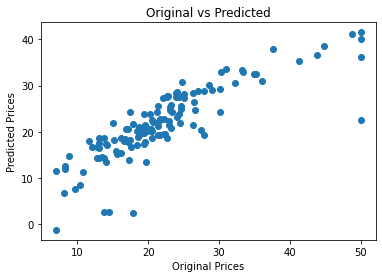

In [40]:
# predicting the test set results 
y_prednew1 = regressor.predict(x_testnew1) 

plt.scatter(y_testnew1, y_prednew1)
plt.xlabel("Original Prices")
plt.ylabel("Predicted Prices")
plt.title("Original vs Predicted")
plt.show()

In [41]:
# Printing Intercept and Slope(CO-efficients)
print(regressor.intercept_)
print(regressor.coef_)

36.34349158051095
[-15.04595324   4.0445886   -1.04284078  -1.04314955  -0.61022891]


In [42]:
mse = sklearn.metrics.mean_squared_error(y_testnew1, y_prednew1)
print(mse)
print(regressor.score(x_testnew1 , y_testnew1))

23.820928123069002
0.7114060082547484


Observation: Now it is evident that removing features actually increasing the error.
So lets try Regularization.


In [43]:
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LinearRegression

##Loading Boston Data
x = boston.data 
y = boston.target 
   
#Splitting Data into test and train  
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state=355)

#Fitting Lasso CV
lasscv = LassoCV(alphas = None,cv =10, max_iter = 100000, normalize = True)
lasscv.fit(x_train, y_train)

LassoCV(cv=10, max_iter=100000, normalize=True)

In [44]:
# best alpha parameter
alpha = lasscv.alpha_
alpha

0.00033837642965584014

In [45]:
#now that we have best parameter, let's use Lasso regression and see how well our data has fitted before

lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.00033837642965584014)

In [46]:
lasso_reg.score(x_test, y_test)

0.7519190930137832

In [47]:
# Using Ridge regression model
# RidgeCV will return best alpha and coefficients after performing 10 cross validations. 
# We will pass an array of random numbers for ridgeCV to select best alpha from them

alphas = np.random.uniform(low=0, high=10, size=(50,))
ridgecv = RidgeCV(alphas = alphas,cv=10,normalize = True)
ridgecv.fit(x_train, y_train)

RidgeCV(alphas=array([8.95276561, 6.0226897 , 2.10807947, 7.3444649 , 0.13361738,
       1.4806936 , 0.49191144, 6.615297  , 7.08216204, 6.47023614,
       0.57336682, 4.45593304, 2.07704647, 5.86363674, 7.71907379,
       8.01851585, 2.4503248 , 7.92278471, 8.83671415, 6.90010418,
       7.78385284, 2.27738064, 6.15798598, 6.08612682, 9.73161551,
       3.00757047, 6.2906818 , 2.59413823, 2.61642621, 1.13380082,
       4.6121265 , 1.06608213, 2.91972551, 9.2582753 , 9.35176386,
       0.04798256, 6.69577711, 7.76027121, 9.40081331, 6.06972931,
       5.10832042, 5.4991673 , 9.61034872, 5.24986477, 9.97428529,
       5.95468087, 8.37500214, 3.5168671 , 2.20066836, 7.50960788]),
        cv=10, normalize=True)

In [48]:
ridgecv.alpha_

0.047982561670645296

In [49]:
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train, y_train)

Ridge(alpha=0.047982561670645296)

In [50]:
ridge_model.score(x_test, y_test)

0.7517570034329363

In [51]:
#Apply Elastic CV

elasticCV = ElasticNetCV(alphas = None, cv =10)

elasticCV.fit(x_train, y_train)

ElasticNetCV(cv=10)

In [52]:
elasticCV.alpha_

1.4462603991896472

In [53]:
elasticCV.l1_ratio

0.5

In [54]:
elasticnet_reg = ElasticNet(alpha = elasticCV.alpha_,l1_ratio=0.5)
elasticnet_reg.fit(x_train, y_train)

ElasticNet(alpha=1.4462603991896472)

In [55]:
elasticnet_reg.score(x_test, y_test)

0.7253548968318255

Conclusion: Lasso Model provided best solution